### NAMA : INDRIANI LUTFIYYATUNNISA
### NIM : 1306620035
### MATA KULIAH : PENGOLAHAN CITRA DIGITAL
___
### TUGAS 7: CORRELATION & CONVOLUTION 

# 1. Buktikan bahwa Konvolusi sama dengan korelasi yang kernelnya di pusat 180 degree?

In [491]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import ndimage
import time

In [492]:
R = 3;

def rotateMatrix(mat):
    i = R - 1;
    while(i >= 0):
        j = R - 1;
        while(j >= 0):
            print(mat[i][j], end = " ");
            j = j - 1;
        print();
        i = i - 1;
    return mat

<IPython.core.display.Javascript object>


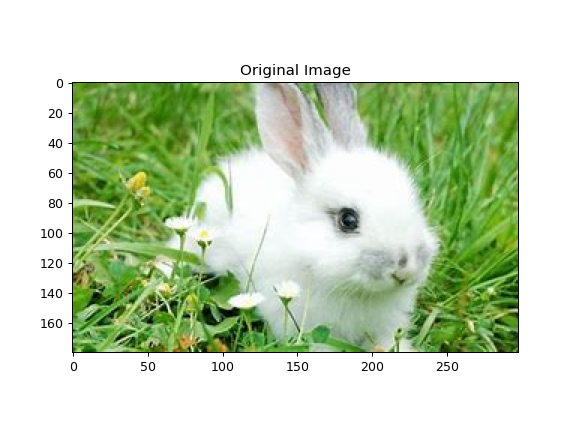

In [493]:
img = cv.imread('rabbit.jpeg')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure()
pixels = np.array(image)
plt.title('Original Image')
plt.imshow(pixels)

<IPython.core.display.Javascript object>


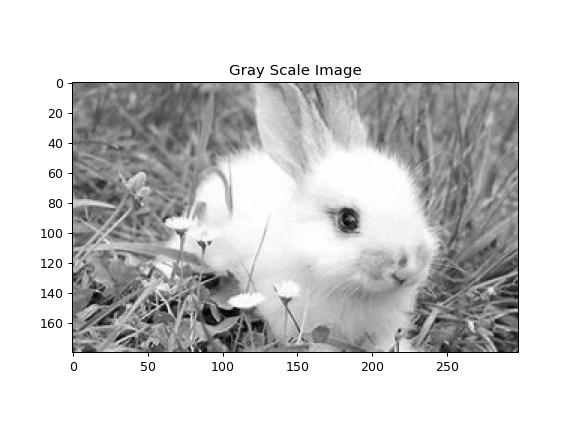

In [494]:
gray = cv.cvtColor(pixels, cv.COLOR_RGB2GRAY)
plt.figure()
plt.title('Gray Scale Image')
plt.imshow(gray,cmap='gray',vmin=0,vmax=255)

In [495]:
kernel = np.array(([-1,-1,-1],[-1,8,-1],[-1,-1,-1]))
kernel_rotate180 = rotateMatrix(kernel.copy())

-1 -1 -1 
-1 8 -1 
-1 -1 -1 


**Korelasi**

In [496]:
correlation = signal.correlate2d(gray,kernel)
correlation_180 = signal.correlate2d(gray,kernel_rotate180)

**Konvolusi**

In [497]:
convolution = signal.convolve2d(gray,kernel)
convolution_180 = signal.convolve2d(gray,kernel_rotate180)

## Sebelum Dirotasi 180 Derajat

### Korelasi

<IPython.core.display.Javascript object>


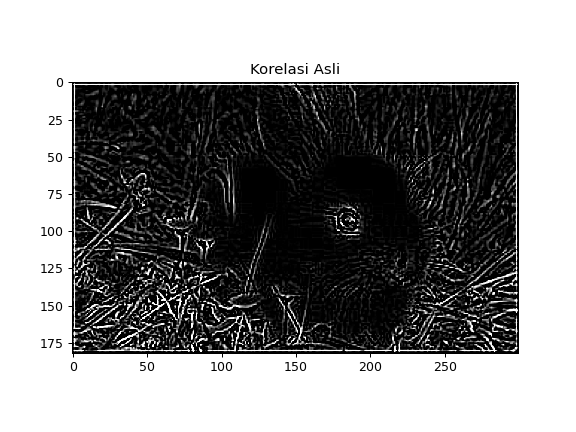

In [498]:
awal1 = time.time()  

plt.figure()
plt.title('Korelasi Asli')
plt.imshow(correlation,cmap='gray',vmin=0,vmax=255)

akhir1 = time.time()  

### Konvolusi

<IPython.core.display.Javascript object>


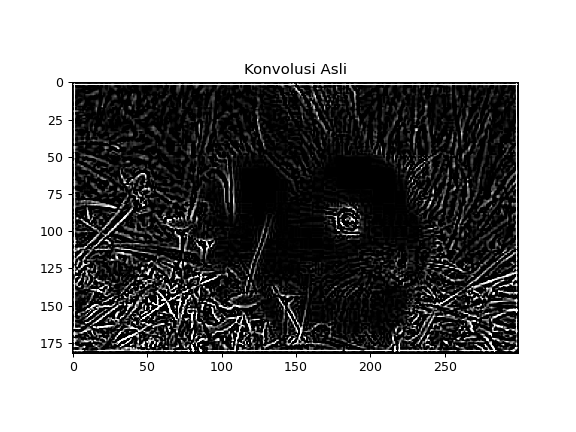

In [499]:
awal2 = time.time()  

plt.figure()
plt.title('Konvolusi Asli')
plt.imshow(convolution,cmap='gray',vmin=0,vmax=255)

akhir2 = time.time()  

## Sesudah Dirotasi 180 Derajat

### Korelasi

<IPython.core.display.Javascript object>


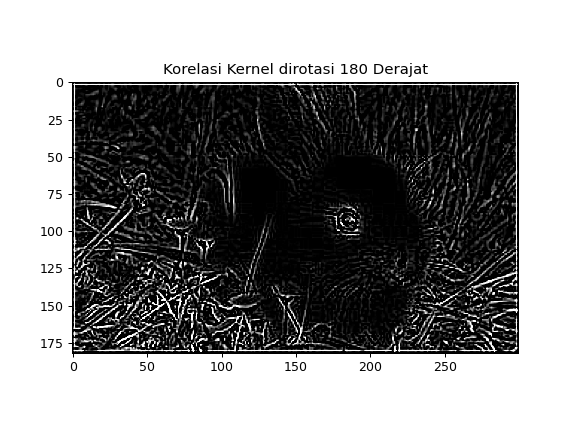

In [500]:
awal3 = time.time() 

plt.figure()
plt.title('Korelasi Kernel dirotasi 180 Derajat')
plt.imshow(correlation_180,cmap='gray',vmin=0,vmax=255)

akhir3 = time.time() 

### Konvolusi

<IPython.core.display.Javascript object>


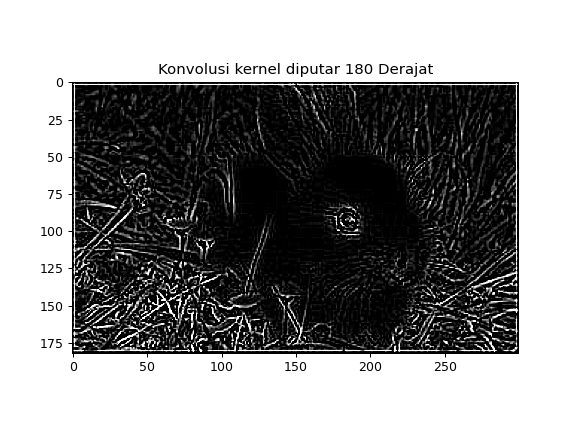

In [501]:
awal4 = time.time() 

plt.figure()
plt.title('Konvolusi kernel diputar 180 Derajat')
plt.imshow(convolution_180,cmap='gray',vmin=0,vmax=255)

akhir4 = time.time() 

# 2. Buat Skript perhitungan konvolusi secara langsung, dan konvolusi dengan transformasi Fourier?

**Korelasi dan Konvolusi pada fft**

In [502]:
#Konvolusi pada fft
fftConvole=signal.fftconvolve(gray,kernel)
fftConvole_180= signal.fftconvolve(gray,kernel_rotate180,)
#fft pada korrelasi
fftcorrelation = signal.correlate2d(fftConvole,kernel)
fftcorrelation_180 = signal.correlate2d(fftConvole_180,kernel_rotate180)

<IPython.core.display.Javascript object>


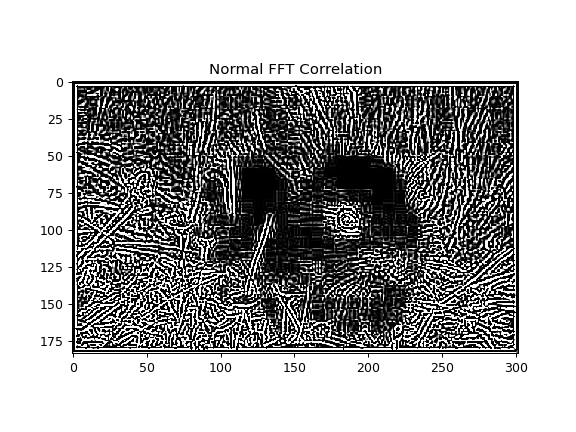

In [503]:
awal5 = time.time()

plt.figure()
plt.title('Normal FFT Correlation')
plt.imshow(fftcorrelation,cmap='gray',vmin=0,vmax=255)

akhir5 = time.time()

<IPython.core.display.Javascript object>


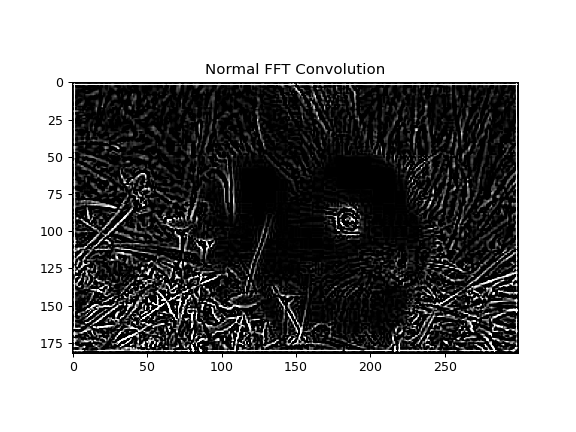

In [504]:
awal6 = time.time()

plt.figure()
plt.title('Normal FFT Convolution')
plt.imshow(fftConvole,cmap='gray',vmin=0,vmax=255)

akhir6 = time.time()

<IPython.core.display.Javascript object>


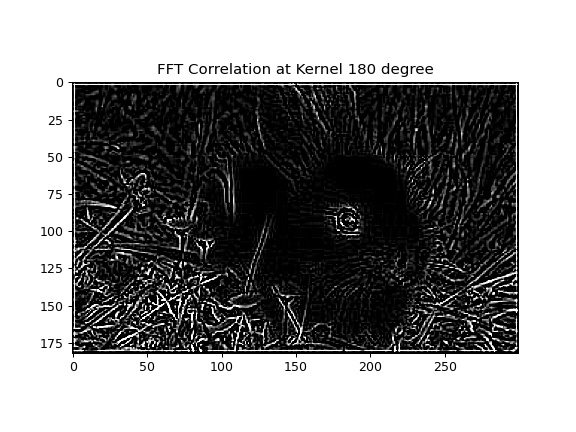

In [505]:
awal7 = time.time()

plt.figure()
plt.title('FFT Correlation at Kernel 180 degree')
plt.imshow(correlation_180,cmap='gray',vmin=0,vmax=255)

akhir7 = time.time()

<IPython.core.display.Javascript object>


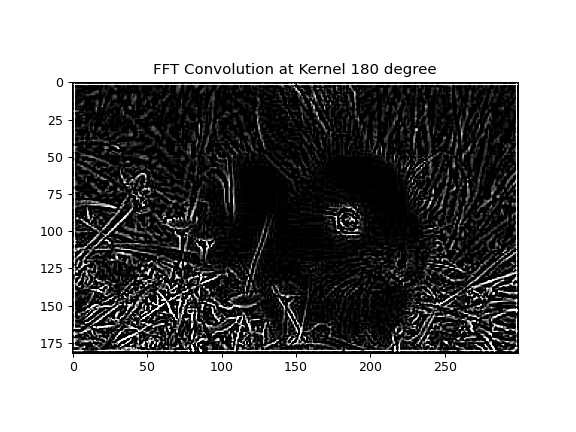

In [506]:
awal8 = time.time()

plt.figure()
plt.title('FFT Convolution at Kernel 180 degree')
plt.imshow(convolution_180,cmap='gray',vmin=0,vmax=255)

akhir8 = time.time()

### Korelasi

# 3. Hitunglah waktu running untuk masing-masing proses konvolusi?

In [507]:
print ("Waktu yang dibutuhkan untuk melakukan korelasi sebelum dirotasi 180 =", akhir1- awal1, "s.")
print ("Waktu yang dibutuhkan untuk melakukan konvolusi sebelum dirotasi 180 =", akhir2- awal2, "s.")
print ("Waktu yang dibutuhkan untuk melakukan korelasi sesudah dirotasi 180 =", akhir3- awal3, "s.")
print ("Waktu yang dibutuhkan untuk melakukan konvolusi sesudah dirotasi 180 =", akhir4- awal4, "s.")

Waktu yang dibutuhkan untuk melakukan korelasi sebelum dirotasi 180 = 0.07413458824157715 s.
Waktu yang dibutuhkan untuk melakukan konvolusi sebelum dirotasi 180 = 0.10526251792907715 s.
Waktu yang dibutuhkan untuk melakukan korelasi sesudah dirotasi 180 = 0.12916851043701172 s.
Waktu yang dibutuhkan untuk melakukan konvolusi sesudah dirotasi 180 = 0.07115721702575684 s.


In [508]:
print ("Waktu yang dibutuhkan untuk melakukan Normal FFT Correlation =", akhir5- awal5, "s.")
print ("Waktu yang dibutuhkan untuk melakukan Normal FFT Convolution =", akhir6- awal6, "s.")
print ("Waktu yang dibutuhkan untuk melakukan FFT Correlation at Kernel 180 degree =", akhir7- awal7, "s.")
print ("Waktu yang dibutuhkan untuk melakukan FFT Convolution at Kernel 180 degree =", akhir8- awal8, "s.")

Waktu yang dibutuhkan untuk melakukan Normal FFT Correlation = 0.051148176193237305 s.
Waktu yang dibutuhkan untuk melakukan Normal FFT Convolution = 0.057506561279296875 s.
Waktu yang dibutuhkan untuk melakukan FFT Correlation at Kernel 180 degree = 0.07593655586242676 s.
Waktu yang dibutuhkan untuk melakukan FFT Convolution at Kernel 180 degree = 0.06361198425292969 s.
